In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from evaluation.model_metadata import DomainModel
from worde4mde import load_embeddings
from evaluation.model_matcher import Grader
from loguru import logger
import sys
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

In [3]:
logger.remove()
# set debug info level to sys.stderr
logger.add(sys.stderr, level="INFO")

1

In [4]:
from evaluation_utils import get_evaluation_results

In [5]:
num_runs = 3
domains = [
    "0_Lab Requisition Management System", 
    "1_Celebrations Organization System (CelO)", 
    "2_Team Sports Scouting (TSS)", 
    "3_SHAS", 
    "4_Online Tutoring System (OTS)", 
    "5_Block", 
    "6_Tile-O", 
    "7_HBMS"
]
models =  ["gpt-4o-mini", "gpt-4o", "Qwen2.5-7B-Instruct-Turbo", "Qwen2.5-72B-Instruct-Turbo", "Meta-Llama-3.1-70B-Instruct-Turbo"] # ["gpt-4o", "gpt-4o-mini", "Meta-Llama-3.1-70B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", "Qwen2.5-72B-Instruct-Turbo"]
approaches = ["sherpa", "direct", "sherpa_mig"] # "mig", 
result_folder = "results_new/"

In [6]:
results = []
reference_folder = "ground_truth"

for model in tqdm(models):
    for approach in approaches:
        run_results = []
        for run in range(1, 1 + num_runs):
            model_folder = f"{result_folder}/{model}_output_{approach}/run{run}"
            print(model_folder)
            result = get_evaluation_results(
                model_folder=model_folder,
                reference_folder=reference_folder,
                domains=domains,
            )
            run_results.append(result)
        
        # average the results across runs
        avg_result = {
            "model": model,
            "approach": approach,
            "avg_precision": np.mean([run["precision"] for run in run_results]),
            "avg_recall": np.mean([run["recall"] for run in run_results]),
            "avg_f1": np.mean([run["f1"] for run in run_results]),
            "f1": [run["f1"] for run in run_results],
            "avg_num_llm_calls": np.mean([run["num_llm_calls"] for run in run_results]),
            "num_llm_calls": [run["num_llm_calls"] for run in run_results],
        }
        results.append(avg_result)

  0%|          | 0/5 [00:00<?, ?it/s]

results_new//gpt-4o-mini_output_sherpa/run1
results_new//gpt-4o-mini_output_sherpa/run2
results_new//gpt-4o-mini_output_sherpa/run3
results_new//gpt-4o-mini_output_direct/run1
results_new//gpt-4o-mini_output_direct/run2
results_new//gpt-4o-mini_output_direct/run3
results_new//gpt-4o-mini_output_sherpa_mig/run1
results_new//gpt-4o-mini_output_sherpa_mig/run2
results_new//gpt-4o-mini_output_sherpa_mig/run3
results_new//gpt-4o_output_sherpa/run1
results_new//gpt-4o_output_sherpa/run2
results_new//gpt-4o_output_sherpa/run3
results_new//gpt-4o_output_direct/run1
results_new//gpt-4o_output_direct/run2
results_new//gpt-4o_output_direct/run3
results_new//gpt-4o_output_sherpa_mig/run1
results_new//gpt-4o_output_sherpa_mig/run2
results_new//gpt-4o_output_sherpa_mig/run3
results_new//Qwen2.5-7B-Instruct-Turbo_output_sherpa/run1
results_new//Qwen2.5-7B-Instruct-Turbo_output_sherpa/run2
results_new//Qwen2.5-7B-Instruct-Turbo_output_sherpa/run3
results_new//Qwen2.5-7B-Instruct-Turbo_output_direct/ru

In [7]:
results_df = pd.DataFrame(results)
results_df[results_df.select_dtypes(include='number').columns] *= 100
df = results_df[["model", "approach", "avg_precision", "avg_recall", "avg_f1"]]
print(df.round(2).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{llrrr}
\toprule
model & approach & avg_precision & avg_recall & avg_f1 \\
\midrule
gpt-4o-mini & sherpa & 85.22 & 70.77 & 76.77 \\
gpt-4o-mini & direct & 88.89 & 63.20 & 73.36 \\
gpt-4o-mini & sherpa_mig & 86.23 & 72.18 & 77.88 \\
gpt-4o & sherpa & 92.82 & 58.65 & 71.16 \\
gpt-4o & direct & 92.98 & 55.24 & 68.90 \\
gpt-4o & sherpa_mig & 93.63 & 61.40 & 73.55 \\
Qwen2.5-7B-Instruct-Turbo & sherpa & 89.75 & 62.06 & 71.57 \\
Qwen2.5-7B-Instruct-Turbo & direct & 81.15 & 47.52 & 57.38 \\
Qwen2.5-7B-Instruct-Turbo & sherpa_mig & 82.84 & 64.82 & 70.93 \\
Qwen2.5-72B-Instruct-Turbo & sherpa & 89.35 & 73.71 & 80.07 \\
Qwen2.5-72B-Instruct-Turbo & direct & 90.41 & 56.78 & 68.98 \\
Qwen2.5-72B-Instruct-Turbo & sherpa_mig & 89.16 & 68.97 & 76.70 \\
Meta-Llama-3.1-70B-Instruct-Turbo & sherpa & 88.51 & 67.68 & 75.80 \\
Meta-Llama-3.1-70B-Instruct-Turbo & direct & 88.76 & 64.07 & 73.85 \\
Meta-Llama-3.1-70B-Instruct-Turbo & sherpa_mig & 88.63 & 62.43 & 72.02 \\
\bottomrule
\end{tabula

In [8]:
(76.77 - 73.36 + 71.16 - 68.90 + 71.57 - 57.38 + 80.07 - 68.98 + 75.80 - 73.85) / 5

6.579999999999996

In [9]:
results_df = pd.DataFrame(results)
results_df["llm"] = results_df["model"]
results_df = results_df.drop(columns=["model"])
results_df = results_df.set_index(["llm", "approach"])
results_df

avg_precision  avg_recall  \
llm                               approach                                
gpt-4o-mini                       sherpa           0.852188    0.707743   
                                  direct           0.888885    0.632044   
                                  sherpa_mig       0.862321    0.721757   
gpt-4o                            sherpa           0.928182    0.586538   
                                  direct           0.929805    0.552412   
                                  sherpa_mig       0.936331    0.613978   
Qwen2.5-7B-Instruct-Turbo         sherpa           0.897497    0.620641   
                                  direct           0.811485    0.475153   
                                  sherpa_mig       0.828384    0.648218   
Qwen2.5-72B-Instruct-Turbo        sherpa           0.893484    0.737116   
                                  direct           0.904127    0.567757   
                                  sherpa_mig       0.891559    0.689692   
Meta-Llama-3.1-70B-Instruct-Turbo sherpa           0.885065    0.676796   
                                  direct           0.887578    0.640690   
                                  sherpa_mig       0.886346    0.624319   

                                                avg_f1  \
llm                               approach               
gpt-4o-mini                       sherpa      0.767728   
                                  direct      0.733593   
                                  sherpa_mig  0.778772   
gpt-4o                            sherpa      0.711616   
                                  direct      0.689031   
                                  sherpa_mig  0.735498   
Qwen2.5-7B-Instruct-Turbo         sherpa      0.715741   
                                  direct      0.573773   
                                  sherpa_mig  0.709289   
Qwen2.5-72B-Instruct-Turbo        sherpa      0.800684   
                                  direct      0.689802   
                                  sherpa_mig  0.766978   
Meta-Llama-3.1-70B-Instruct-Turbo sherpa      0.757978   
                                  direct      0.738477   
                                  sherpa_mig  0.720155   

                                                                                             f1  \
llm                               approach                                                        
gpt-4o-mini                       sherpa      [0.7727659491264456, 0.7772452059475763, 0.753...   
                                  direct      [0.7425320165477156, 0.7265713222194975, 0.731...   
                                  sherpa_mig  [0.7871196590506704, 0.7670109800730875, 0.782...   
gpt-4o                            sherpa      [0.7299353639387927, 0.7000502503355629, 0.704...   
                                  direct      [0.6897096057090362, 0.6827541208123749, 0.694...   
                                  sherpa_mig  [0.7349285174483025, 0.722945676473953, 0.7486...   
Qwen2.5-7B-Instruct-Turbo         sherpa      [0.7035655381562342, 0.7266490467472949, 0.717...   
                                  direct      [0.6289038152799933, 0.5348447856146081, 0.557...   
                                  sherpa_mig  [0.7367166931522102, 0.6818823526016162, 0.709...   
Qwen2.5-72B-Instruct-Turbo        sherpa      [0.7927920944012827, 0.8075190701549475, 0.801...   
                                  direct      [0.6901270334748932, 0.7274203033872862, 0.651...   
                                  sherpa_mig  [0.8038331247927795, 0.7189106345738483, 0.778...   
Meta-Llama-3.1-70B-Instruct-Turbo sherpa      [0.7648980192901076, 0.7410547141492703, 0.767...   
                                  direct      [0.7544166194720305, 0.7248550847356829, 0.736...   
                                  sherpa_mig  [0.7326583203511161, 0.7204282088176445, 0.707...   

                                              avg_num_llm_calls  \
llm                             

In [18]:
llms = ["gpt-4o-mini", "gpt-4o", "Qwen2.5-7B-Instruct-Turbo", "Qwen2.5-72B-Instruct-Turbo", "Meta-Llama-3.1-70B-Instruct-Turbo"] # ["gpt-4o", "gpt-4o-mini", "Qwen2.5-7B-Instruct-Turbo", "Qwen2.5-72B-Instruct-Turbo", "Qwen2.5-Coder-32B-Instruct"] # , "Meta-Llama-3.1-8B-Instruct-Turbo", "Meta-Llama-3.1-70B-Instruct-Turbo"
approaches = ["direct", "sherpa_mig", "sherpa"]

llm_names = ["GPT-4o\nMini", "GPT-4o", "Qwen2.5\n7B", "Qwen2.5\n72B", "Llama3.1\n70B"]
approach_names = ["Direct", "MIG", "Inspection"]

In [19]:
f1_data = {}
for approach in approaches:
    approach_f1_data = []
    for llm in llms:
        approach_f1_data.append(results_df.loc[(llm, approach), "avg_f1"] * 100)
    f1_data[approach] = approach_f1_data

call_data = {}
for llm in llms:
    call_data[llm] = []
    for approach in approaches:
        call_data[llm].append(results_df.loc[(llm, approach), "avg_num_llm_calls"])
    
    

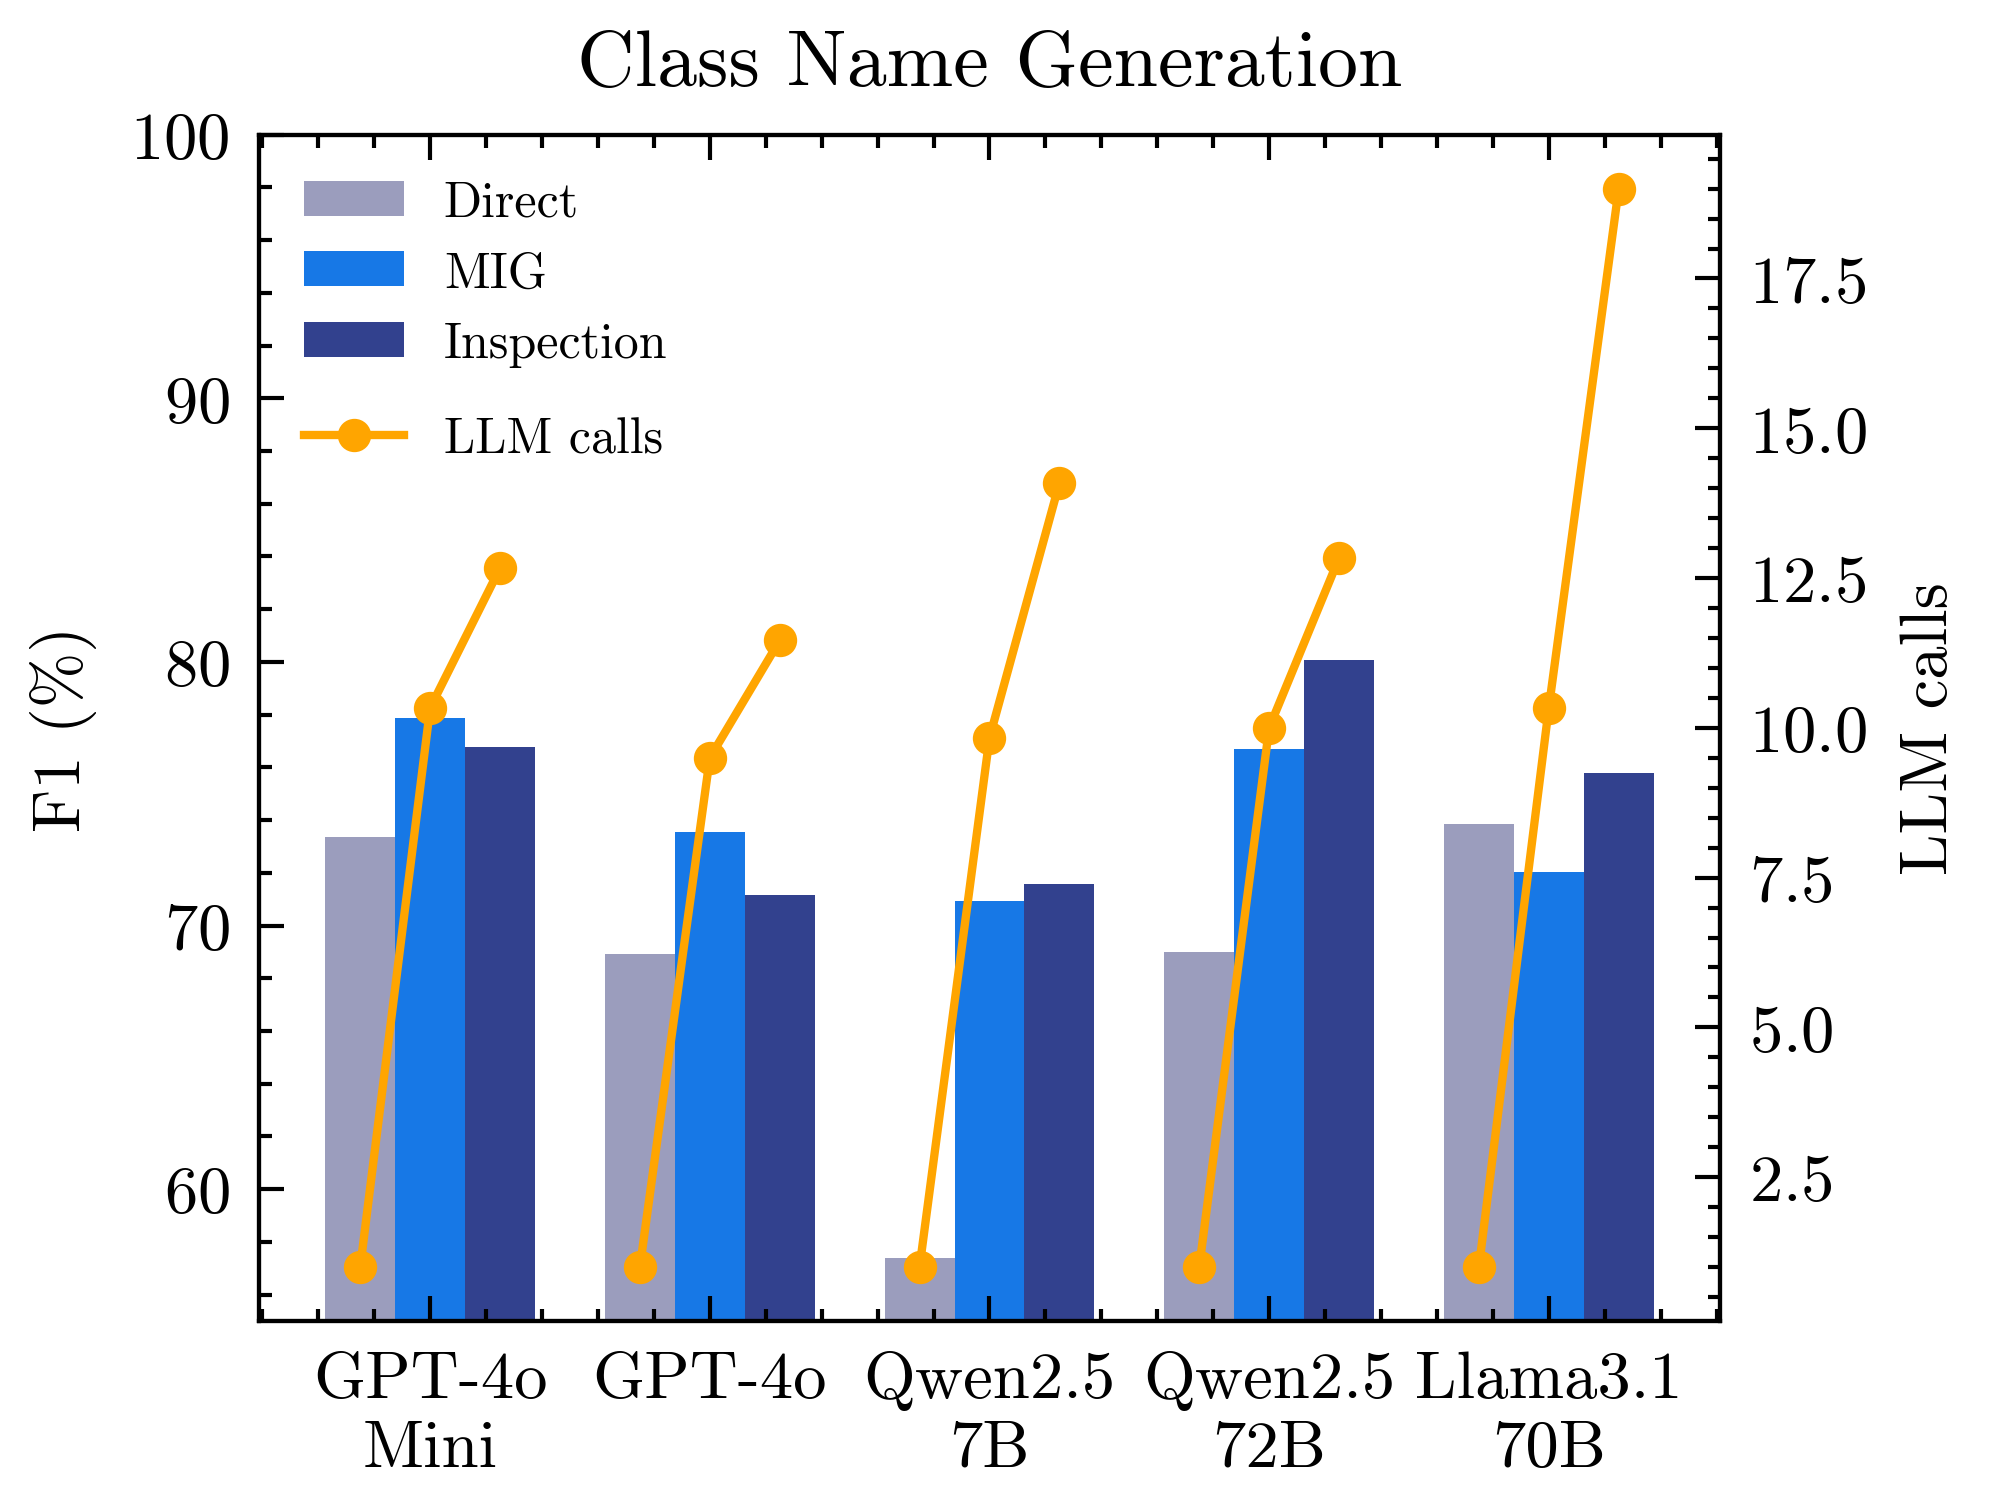

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science','ieee', 'no-latex'])

x = np.arange(len(llms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
colors = ["#9b9dbd", "#1778E6", "#32418E"]
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in f1_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=approach_names[multiplier], color=colors[multiplier])
    # ax.bar_label(rects, padding=3)
    multiplier += 1
ax.set_ylabel('F1 (%)')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Length (mm)')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, llm_names)
ax.legend(fontsize=6, loc="upper left")
# ax.legend(loc='upper left', ncols=3)
ax.set_ylim(55, 100)
line_color = "#ffa500"

ax2 = ax.twinx()
start = 0
for i, llm in enumerate(llms):
    x = [start, start + width, start + 2 * width]
    if i == 0:
        ax2.plot(x, call_data[llm], marker='.', color=line_color, linestyle="-", label="LLM calls")
    else:
        ax2.plot(x, call_data[llm], marker='.', color=line_color, linestyle="-")
    start = 4 * width + start
ax2.set_ylabel('LLM calls')
ax2.legend(fontsize=6, loc='upper left', bbox_to_anchor=(0,0.8))

plt.title("Class Name Generation")
plt.savefig("class_name_generation.pdf", bbox_inches='tight', dpi=300)
plt.show()